<a href="https://colab.research.google.com/github/jetcanine/Stock-Market-Prediction-Using-LSTM/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas_datareader as pdr
key="3f12bdaa0c803e87f28ae7e3daf5ce2417c87728"

In [2]:
df = pdr.get_data_tiingo('GOOG', api_key=key)
df.to_csv('GOOG.csv')



<ipython-input-2-ea5e6dd1dfbe>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('GOOG', api_key=key)


In [4]:
import pandas as pd
df=pd.read_csv('GOOG.csv')


In [5]:

df.head()


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2018-09-05 00:00:00+00:00,1186.48,1199.01,1162.000,1193.80,2061309,59.3240,59.9505,58.10000,59.6900,41226180,0.0,1.0
1,GOOG,2018-09-06 00:00:00+00:00,1171.44,1186.30,1152.000,1186.30,1888467,58.5720,59.3150,57.60000,59.3150,37769340,0.0,1.0
2,GOOG,2018-09-07 00:00:00+00:00,1164.83,1175.26,1157.215,1158.67,1401404,58.2415,58.7630,57.86075,57.9335,28028080,0.0,1.0
3,GOOG,2018-09-10 00:00:00+00:00,1164.64,1174.54,1160.110,1172.19,1115796,58.2320,58.7270,58.00550,58.6095,22315920,0.0,1.0
4,GOOG,2018-09-11 00:00:00+00:00,1177.36,1178.68,1156.240,1161.63,1209565,58.8680,58.9340,57.81200,58.0815,24191300,0.0,1.0


In [6]:
df.tail()


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,GOOG,2023-08-28 00:00:00+00:00,131.79,133.240,130.850,132.0800,16715467,131.79,133.240,130.850,132.0800,16715467,0.0,1.0
1253,GOOG,2023-08-29 00:00:00+00:00,135.49,137.295,132.980,132.9981,30803265,135.49,137.295,132.980,132.9981,30803265,0.0,1.0
1254,GOOG,2023-08-30 00:00:00+00:00,136.93,137.250,135.021,135.5700,21773356,136.93,137.250,135.021,135.5700,21773356,0.0,1.0
1255,GOOG,2023-08-31 00:00:00+00:00,137.35,138.400,136.820,137.0500,28147850,137.35,138.400,136.820,137.0500,28147850,0.0,1.0
1256,GOOG,2023-09-01 00:00:00+00:00,136.80,138.580,135.940,138.4300,16671647,136.80,138.580,135.940,138.4300,16671647,0.0,1.0


In [7]:
df1=df.reset_index()['close']

In [8]:
df1


0       1186.48
1       1171.44
2       1164.83
3       1164.64
4       1177.36
         ...   
1252     131.79
1253     135.49
1254     136.93
1255     137.35
1256     136.80
Name: close, Length: 1257, dtype: float64

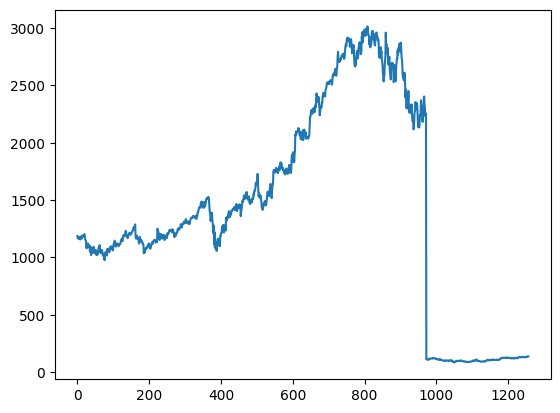

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
import numpy as np

from sklearn.preprocessing import MinMaxScaler #Used MinmaxScalar since LSTM requires values between 0 to 1
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
df1.shape

(1257, 1)

In [12]:
print(df1)


[[0.37635847]
 [0.37122657]
 [0.36897113]
 ...
 [0.01823461]
 [0.01837792]
 [0.01819026]]


For Timeseries Data, the next data is dependent on the pervious. Hence we will split the data into traning and testing

Eg : Suppose the timeseries dataset contains the following parameters
# 150, 139, 134, 140, 149, 145, 180, 182, 145
We will split the data into,

**Training** : 150, 139, 134, 140, 149 and **Testing** : 145, 180, 182, 145

In [14]:
##splitting dataset into train and test
training_size=int(len(df1)*0.65) #This indicates 65% of total length of data will be training set
test_size=len(df1)-training_size #Total length of data - Training Size = Test_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size


(817, 440)

# Preprocessing Using TimeSteps
 150, 139, 134, 140  

Timesteps = 3

x_train   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;        y_train

f1   &nbsp;&nbsp;  f2 &nbsp;&nbsp;&nbsp;   f3 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; o/p

150, 139, 134 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;140

139, 134, 140 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;149
</br>
</br>
</br>

y_train   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;        y_test


f1   &nbsp;&nbsp;  f2 &nbsp;&nbsp;&nbsp;   f3 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; o/p


145, 180, 182, &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;145

180, &nbsp;&nbsp; ... &nbsp;&nbsp;    ...   


In [16]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)


(716, 100)
(716,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
12/12 [==============================] - 12s 359ms/step - loss: 0.1041 - val_loss: 0.0262
Epoch 2/100
12/12 [==============================] - 3s 241ms/step - loss: 0.0132 - val_loss: 0.0417
Epoch 3/100
12/12 [==============================] - 3s 293ms/step - loss: 0.0062 - val_loss: 0.0216
Epoch 4/100
12/12 [==============================] - 3s 247ms/step - loss: 0.0027 - val_loss: 0.0199
Epoch 5/100
12/12 [==============================] - 3s 237ms/step - loss: 0.0012 - val_loss: 0.0188
Epoch 6/100
12/12 [==============================] - 3s 237ms/step - loss: 7.6682e-04 - val_loss: 0.0182
Epoch 7/100
12/12 [==============================] - 3s 252ms/step - loss: 7.4293e-04 - val_loss: 0.0176
Epoch 8/100
12/12 [==============================] - 3s 282ms/step - loss: 7.0394e-04 - val_loss: 0.0172
Epoch 9/100
12/12 [==============================] - 2s 209ms/step - loss: 6.8839e-04 - val_loss: 0.0173
Epoch 10/100
12/12 [==============================] - 3s 238ms/step - loss

In [25]:
import tensorflow as tf
#prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 42ms/step


In [26]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [27]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1794.2295589639282

In [28]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

988.1563108474018

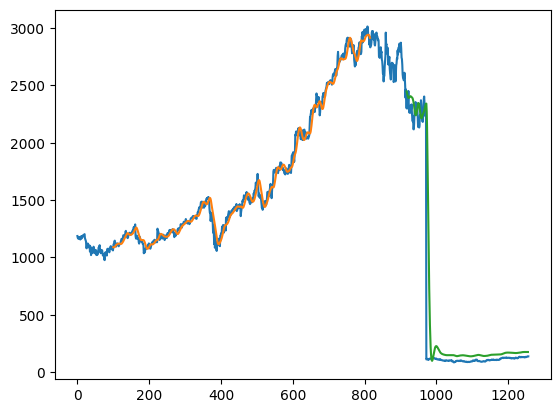

In [29]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()